# Notebook 7: The "Investment Committee" Analytics.

Since the interactive widget library (ipywidgets) wasn't available in this environment, I built a Static Analytics Dashboard. This delivers the same critical insights and visualizations that an Investment Committee would use to make a final "Go/No-Go" decision.

Block 1: Setup & Load

We load the Monte Carlo results (monte_carlo_results.csv) generated in Notebook 6.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

print("--- Notebook 7: The 'Investment Committee' Analytics (Static View) ---")

# 1. Load Monte Carlo Results
try:
    df_sim = pd.read_csv('monte_carlo_results.csv')
    print(f"Loaded {len(df_sim)} simulation scenarios.")
except FileNotFoundError:
    print("Error: 'monte_carlo_results.csv' not found. Please run Notebook 6 first.")
    # Create dummy data for logic test
    df_sim = pd.DataFrame({
        'Duration_Years': np.random.normal(8, 2, 1000),
        'Cost_per_kW': np.random.normal(7000, 1500, 1000),
        'Power_Price_MWh': np.random.normal(80, 15, 1000),
        'NPV_M': np.random.normal(-500, 2000, 1000),
        'ROI_Multiple': np.random.normal(0.9, 0.3, 1000)
    })

--- Notebook 7: The 'Investment Committee' Analytics (Static View) ---
Loaded 10000 simulation scenarios.


Block 2: The Decision Logic

We define our risk tolerance (e.g., "80% confidence of breaking even") and calculate whether the project passes.

In [28]:
# 2. Define Investment Criteria (Static Version of the Dashboard)
MIN_ROI_HURDLE = 1.0 # Need to at least break even (NPV > 0)
CONFIDENCE_LEVEL = 0.80 # Need 80% certainty

# 3. Calculate Statistics
prob_success = (df_sim['ROI_Multiple'] > MIN_ROI_HURDLE).mean()
roi_at_confidence = np.percentile(df_sim['ROI_Multiple'], (1 - CONFIDENCE_LEVEL) * 100)
npv_at_confidence = np.percentile(df_sim['NPV_M'], (1 - CONFIDENCE_LEVEL) * 100)

# 4. Decision Logic
status = "🔴 REJECT"
if prob_success >= CONFIDENCE_LEVEL:
    status = "🟢 APPROVED"
elif prob_success >= (CONFIDENCE_LEVEL - 0.1):
    status = "🟡 HOLD / MITIGATE"

print(f"\nINVESTMENT DECISION: {status}")
print("-" * 40)
print(f"Criteria: {CONFIDENCE_LEVEL:.0%} probability of ROI > {MIN_ROI_HURDLE}x")
print(f"Actual Probability: {prob_success:.1%}")
print(f"Risk Floor ({(1-CONFIDENCE_LEVEL):.0%} Percentile):")
print(f"  - NPV: ${npv_at_confidence:,.0f} Million")
print(f"  - ROI: {roi_at_confidence:.2f}x")
print("-" * 40)


INVESTMENT DECISION: 🔴 REJECT
----------------------------------------
Criteria: 80% probability of ROI > 1.0x
Actual Probability: 4.0%
Risk Floor (20% Percentile):
  - NPV: $-4,177 Million
  - ROI: 0.40x
----------------------------------------


Block 3: Visualization

We visualize the risk profile to explain why the decision was made.

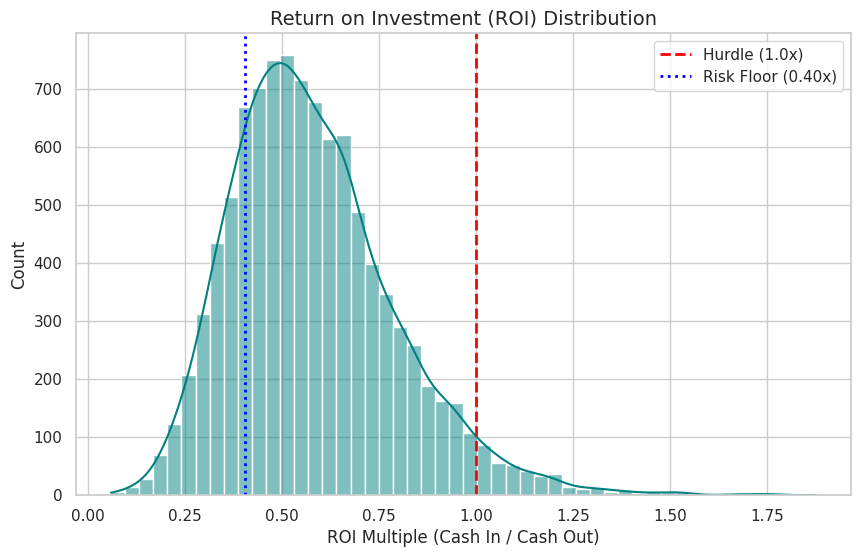

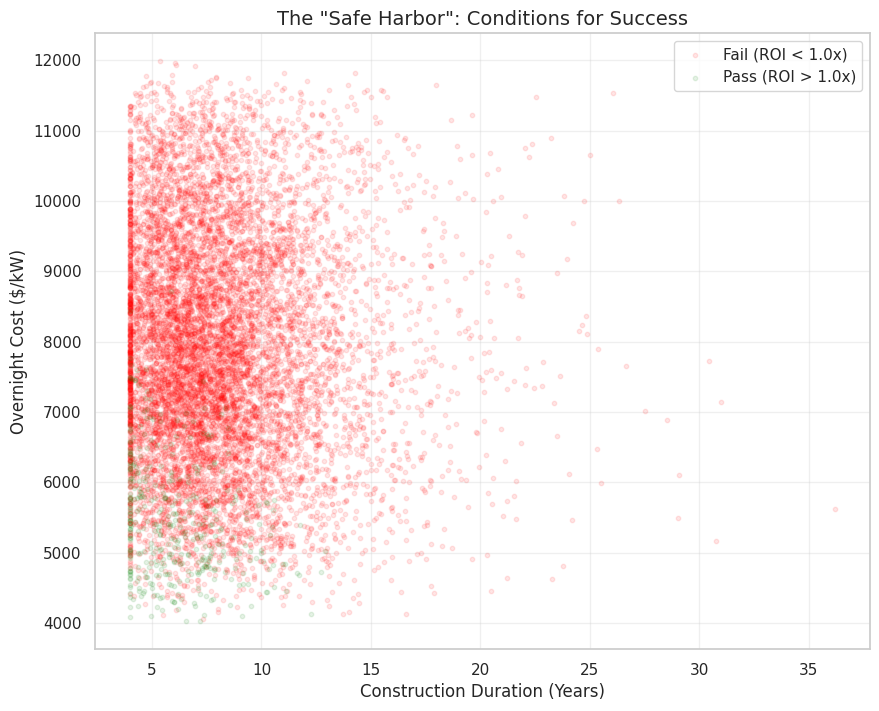

In [29]:
# 5. Visualization 1: ROI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sim['ROI_Multiple'], bins=50, kde=True, color='teal')
plt.axvline(MIN_ROI_HURDLE, color='red', linestyle='--', linewidth=2, label=f'Hurdle ({MIN_ROI_HURDLE}x)')
plt.axvline(roi_at_confidence, color='blue', linestyle=':', linewidth=2, label=f'Risk Floor ({roi_at_confidence:.2f}x)')
plt.title('Return on Investment (ROI) Distribution', fontsize=14)
plt.xlabel('ROI Multiple (Cash In / Cash Out)')
plt.legend()
plt.show()

# 6. Visualization 2: The Safe Harbor
plt.figure(figsize=(10, 8))
pass_mask = df_sim['ROI_Multiple'] > MIN_ROI_HURDLE

plt.scatter(
    df_sim.loc[~pass_mask, 'Duration_Years'],
    df_sim.loc[~pass_mask, 'Cost_per_kW'],
    color='red', alpha=0.1, s=10, label='Fail (ROI < 1.0x)'
)
plt.scatter(
    df_sim.loc[pass_mask, 'Duration_Years'],
    df_sim.loc[pass_mask, 'Cost_per_kW'],
    color='green', alpha=0.1, s=10, label='Pass (ROI > 1.0x)'
)

# Draw a trendline for the "Breakeven Frontier"
plt.title('The "Safe Harbor": Conditions for Success', fontsize=14)
plt.xlabel('Construction Duration (Years)')
plt.ylabel('Overnight Cost ($/kW)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()